In [1]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2').to(device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

Using cpu device
Loading model: gpt2


/home/giles/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!
Moving model to device:  cpu


In [40]:
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 1000
alpha = 0.7

dl = MiniBatchDictionaryLearning(n_components=n_components, batch_size=256, alpha=alpha, transform_alpha=alpha, positive_code=True, fit_algorithm='cd', transform_algorithm='lasso_cd', max_iter=5, verbose=1)
codes = dl.fit_transform(unembed.T)
dictionary = dl.components_

codes = torch.tensor(codes)
dictionary = torch.tensor(dictionary)

print(codes.shape, dictionary.shape)

[dict_learning]
243 unused atoms resampled.
Minibatch step 1/985: mean batch cost: 6.199551423380358
36 unused atoms resampled.
Minibatch step 2/985: mean batch cost: 10.573004796723199
15 unused atoms resampled.
Minibatch step 3/985: mean batch cost: 10.266900698404449
7 unused atoms resampled.
Minibatch step 4/985: mean batch cost: 10.547149084444056
3 unused atoms resampled.
Minibatch step 5/985: mean batch cost: 9.9825497862673
1 unused atoms resampled.
Minibatch step 6/985: mean batch cost: 10.494930111454682
Minibatch step 7/985: mean batch cost: 10.092036724496557
Minibatch step 8/985: mean batch cost: 10.24300843794794
Minibatch step 9/985: mean batch cost: 10.213753912722307
Minibatch step 10/985: mean batch cost: 10.271644140943568
Minibatch step 11/985: mean batch cost: 10.248370582688365
Minibatch step 12/985: mean batch cost: 10.324614384473563
Minibatch step 13/985: mean batch cost: 9.90485058851117
Minibatch step 14/985: mean batch cost: 10.170916364791134
Minibatch step

Minibatch step 127/985: mean batch cost: 9.590725749242118, ewa cost: 9.837639481733287
Minibatch step 128/985: mean batch cost: 9.733441904279491, ewa cost: 9.837108728821747
Minibatch step 129/985: mean batch cost: 9.548213860177402, ewa cost: 9.835637180284738
Minibatch step 130/985: mean batch cost: 9.936047963138911, ewa cost: 9.836148644338436
Minibatch step 131/985: mean batch cost: 9.845616125737273, ewa cost: 9.836196869003926
Minibatch step 132/985: mean batch cost: 9.993648834395847, ewa cost: 9.836998884665917
Minibatch step 133/985: mean batch cost: 9.502447763667607, ewa cost: 9.835294776126469
Minibatch step 134/985: mean batch cost: 9.451725902853143, ewa cost: 9.833340985057227
Minibatch step 135/985: mean batch cost: 9.656676264630576, ewa cost: 9.83244110506938
Minibatch step 136/985: mean batch cost: 9.686813750285996, ewa cost: 9.831699320620645
Minibatch step 137/985: mean batch cost: 9.815450005416839, ewa cost: 9.831616551216925
Minibatch step 138/985: mean batc

In [52]:
component_labels = [None] * n_components
for i in range(n_components):
    nz = torch.nonzero(codes[:,i])
    print(i, ' --- ', nz.shape[0])
    values = [(codes[t,i].item(), decode(t.item())) for t in nz]
    values.sort(reverse=True)
    #print([decode(t) for t in ])
    print([tok for _,tok in values])
    print()
    component_labels[i] = values[0][1]

0  ---  1263
[' exert', ' relinqu', ' deline', ' extingu', ' disp', ' deleg', ' inoc', ' mobil', ' usur', ' assimil', ' diss', ' dissemin', ' consolid', ' appropri', ' releg', ' legitim', ' diseng', ' displ', ' util', ' adjud', ' conce', ' acquies', ' instit', ' cons', ' consum', ' acqu', ' circum', ' commod', ' cens', ' annex', ' diver', ' emanc', ' impl', ' enlist', ' asc', ' propag', ' repud', ' inaug', ' ded', ' unle', ' segreg', ' dispers', ' demol', ' estab', ' annihil', ' precip', ' amalg', ' isol', ' extermin', ' perpet', ' enumer', ' manifest', ' redef', ' decon', ' persu', ' obliter', ' dep', ' esche', ' coales', ' disav', ' enc', ' infl', ' priorit', ' divers', ' undert', ' decentral', ' exh', ' erect', ' divul', ' necess', ' categor', ' extrap', ' calibr', ' transc', ' eluc', ' surve', ' substant', ' allev', ' furn', ' encl', ' accommod', ' augment', ' condu', ' appe', ' requ', ' ascert', ' consec', ' proc', ' synthes', ' cond', ' aff', ' conve', ' monopol', ' sever', ' del

[' conson', ' pronounce', ' pronoun', ' vow', ' pron', ' voc', ' convers', ' vowel', ' surn', ' pronouns', ' oath', ' decl', ' apost', ' accus', ' plural', ' affirm', ' eloqu', ' narr', ' verbs', ' obe', ' plaint', ' emot', ' emph', ' plur', ' obedient', ' appell', ' greet', ' refere', ' disemb', ' cogn', ' adject', ' syll', ' forc', ' sworn', ' phon', ' contr', ' aspir', ' disob', ' affidav', ' imperson', ' advers', ' testim', ' indist', ' partic', ' volunt', ' civ', ' curs', ' propos', ' noun', ' repet', ' continu', ' utter', ' disson', ' rhet', ' lear', ' commun', ' nomine', ' interrog', ' inward', ' solemn', ' particip', ' prose', ' appar', ' expressive', ' wills', ' alleg', ' fug', ' descript', ' conject', ' lucid', ' bellig', ' verb', ' corpor', ' possess', ' interpre', ' recite', ' percept', ' persuasion', ' nom', ' voic', ' pronounced', ' ambig', ' summons', 'unci', ' phr', ' greeting', ' oppos', ' obst', ' outward', ' singular', ' eyewitness', ' propri', ' recept', ' dialect',

[' Packers', ' Bengals', ' Broncos', ' Steelers', ' Orioles', ' Cardinals', ' Dodgers', ' Cubs', ' Giants', ' Braves', ' Eagles', ' Falcons', ' Astros', ' Penguins', ' Phillies', ' Colts', ' Mariners', ' Chargers', ' Buccaneers', ' Bears', ' Patriots', ' Yankees', ' Royals', ' Blackhawks', ' Bucs', ' Coyotes', ' Padres', ' Seahawks', ' Jets', ' Dolphins', ' Bruins', ' Flyers', ' Sabres', ' Chiefs', ' Vikings', ' Redskins', ' Cowboys', ' Jaguars', ' Ravens', ' Oilers', ' Raiders', ' Bills', ' Rays', ' Capitals', ' Rams', ' Mets', ' Browns', ' Devils', ' Reds', ' Saints', ' Canucks', ' Sox', ' Rockies', ' Brewers', ' Panthers', ' Marlins', ' Twins', ' Islanders', ' Sharks', ' Pirates', ' Nationals', ' Canadiens', ' Texans', ' Lions', ' Leafs', ' Ducks', ' Titans', ' Timbers', ' Jays', ' Tigers', ' Rangers', ' Predators', ' Jackets', ' Angels', ' Bulldogs', ' Blues', ' Hurricanes', ' Sounders', ' Pats', ' Sixers', ' Avalanche', ' Bulls', ' Hawks', ' Suns', ' Senators', ' Flames', ' Wildca

[' Tottenham', ' Everton', ' Liverpool', ' Anfield', 'Liverpool', ' Sunderland', ' Arsenal', ' Dortmund', ' Chelsea', ' Trafford', ' Stoke', 'Manchester', ' Bayern', ' Swansea', ' Manchester', 'Arsenal', ' Mourinho', 'Chelsea', ' Southampton', ' Klopp', ' Wenger', ' Wembley', ' Leicester', ' Newcastle', ' Norwich', ' Juventus', ' Guardiola', ' Gerrard', ' Stamford', ' Hull', 'ottenham', ' Leeds', ' Gaal', ' Ajax', ' Portsmouth', ' Wolver', ' Villa', ' Bolton', ' Aston', ' Blackburn', 'icester', ' Rooney', ' Middles', ' Barcelona', ' Ronaldo', ' Spurs', ' Albion', 'ortmund', 'iverpool', 'letico', ' Pep', ' Derby', ' Rodgers', ' Cardiff', ' Bale', ' Marse', ' Sheffield', ' Ful', ' Bradford', ' UEFA', ' Pog', ' Messi', ' Nottingham', ' Birmingham', ' Gron', ' Roma', ' Suarez', ' goalkeeper', ' Beckham', ' Ferguson', ' Poc', ' Milan', ' midfielder', ' Bundesliga', ' Monaco', ' Sporting', ' Wim', 'ventus', ' Chamberlain', ' Brighton', ' striker', ' Fifa', ' Sev', ' Keane', ' Dynamo', ' Stur

[' designers', ' developers', ' programmers', ' reviewers', ' builders', ' creators', ' testers', ' producers', ' devs', ' operators', ' enthusiasts', ' commenters', ' growers', ' writers', ' marketers', ' filmmakers', ' brewers', ' owners', ' artists', ' authors', ' makers', ' researchers', ' sellers', ' promoters', ' photographers', ' collectors', ' lenders', ' organisers', ' organizers', ' publishers', ' backers', ' skeptics', ' distributors', ' contributors', ' proponents', ' bloggers', ' providers', ' broadcasters', ' advertisers', ' astronomers', ' dealers', ' admins', ' manufacturers', ' climbers', ' vendors', ' detractors', ' critics', ' buyers', ' farmers', ' theorists', ' hunters', ' editors', ' traders', ' pilots', ' folks', ' gamers', ' DJs', ' investors', ' shooters', ' lovers', ' miners', ' hitters', ' practitioners', ' moderators', ' hackers', ' chefs', ' guys', ' explorers', ' entrepreneurs', ' crews', ' nerds', ' fans', ' biologists', ' landlords', ' runners', ' automa

[' target', ' targets', 'target', ' targeting', ' targeted', ' Target', 'Target', 'ARGET', ' aiming', ' aim', ' targ', ' Targ', ' goal', ' aimed', ' victim', 'arget', ' objective', ' Aim', ' prey', ' destination', ' sights', 'Aim', ' objectives', ' aims', ' intended', ' goals', ' pinpoint', 'goal', ' destinations', ' focus', 'aim', ' tailor', ' Goal', ' focused', ' intent', ' victims', ' focusing', 'Goal', ' scapego', ' geared', ' tailored', ' singled', ' hitting', ' intention', 'ocused', ' subject', ' beneficiary', 'intent', ' focuses', ' attacking', ' hit', ' recipient', ' trigger', ' gearing', ' Victim', ' intending', ' intentions', ' foc', ' trajectory', ' quarry', ' focal', ' ideally', ' intend', ' timing', ' bait', ' vulnerable', ' phased', ' Victims', ' tracking', ' aggress', ' battleground', ' object', ' staging', ' Destination', ' Goals', 'vict', ' victimized', ' range', ' designated', ' strategy', 'object', ' recipients', ' sight', ' planned', ' aggressively', ' captive', 'pu

['urrencies', 'urrency', 'urrent', 'ertain', 'ategor', 'ultural', 'olor', 'rencies', 'ollar', 'currency', 'ursor', 'URR', 'ursive', 'redits', 'ourses', 'ulture', 'elsius', 'arbon', 'erning', 'ulty', 'riminal', 'ourse', 'ookie', 'riber', 'overed', 'urring', 'ustomed', 'annabin', 'ustom', 'ussions', 'rypted', 'ivil', 'ritical', 'ording', 'redited', 'onsequ', 'ouple', 'urrence', 'urry', 'oded', 'ordable', 'oding', 'redit', 'ordes', 'ategories', 'onduct', 'itizens', 'ancel', 'ount', 'uador', 'onductor', 'ategory', 'redible', 'irc', 'ussion', 'ramer', 'ipher', 'ribing', 'olls', 'oll', 'rimination', 'olon', 'ombat', 'URRENT', 'chio', 'ycle', 'laim', 'OUNT', 'urred', 'odes', 'ursed', 'aucus', 'asionally', 'risis', 'ryption', 'ospons', 'ognitive', 'urses', 'OUN', 'rowd', 'asio', 'urse', 'rued', 'itizen', 'aucas', 'ription', 'orrect', 'entric', ' currencies', 'aught', 'ORPG', 'orsi', 'ranean', 'ritic', 'otton', 'asper', 'aucuses', 'uracy', 'ricular', 'razy', 'ourt', 'anyon', 'orde', 'annot', 'a

['requires', 'Allows', 'Requires', 'Adds', ' Requires', ' Allows', 'allows', ' Provides', 'Increases', ' Adds', ' Supports', ' Contains', ' Increases', 'helps', 'makes', 'Includes', 'includes', ' Includes', 'does', 'doesn', 'uces', ' Starts', ' Comes', ' Makes', ' Gets', 'comes', ' Cannot', 'reads', 'opens', 'has', ' Takes', 'allow', 'Has', 'needs', ' Uses', 'poses', 'optional', 'Returns', ' Kills', ' Learns', ' Appears', ' Begins', 'Does', ' Means', ' Doesn', 'gets', 'require', ' Shows', ' Grants', 'ends', 'ifies', 'shall', 'olves', 'Must', 'annot', ' requires', ' Sets', ' Causes', 'lishes', 'Allow', 'fits', 'required', ' Required', ' Requirements', ' Runs', 'thens', 'izes', ' Does', 'shows', ' Needs', ' Provide', ' Goes', 'cludes', 'Requirements', ' Ens', 'OULD', ' Ends', 'recomm', ' grants', 'Works', 'BILITIES', ' Seems', 'iates', ' restores', 'earable', 'Required', 'Optional', 'Enabled', ' Looks', ' unlocks', 'Introduced', ' SHALL', 'ulates', 'powers', ' Deals', ' Costs', ' requiri

[' tails', 'HEAD', 'tails', ' heads', 'heads', 'Head', 'head', 'tail', ' tail', ' HEAD', ' Head', 'ails', ' Heads', ' head', ' Tail', 'ail', 'tailed', ' noses', 'headed', 'ailing', 'heading', 'ailed', ' headed', ' mouths', ' heading', ' necks', ' sails', ' horns', 'hair', ' Nose', ' nose', ' Hair', 'eyes', ' tongues', 'neck', ' throats', ' faces', ' Legs', ' hair', ' wings', ' Mouth', ' horn', ' mast', ' skulls', 'body', ' fins', ' jaws', ' neck', 'face', ' hind', ' bodies', ' Skull', 'aft', 'awed', 'Body', 'ILS', ' Horn', ' shoulders', ' Hind', ' headlights', ' brains', ' rear', 'ailable', 'mouth', ' legs', ' backs', 'Chief', ' tentacles', 'eye', ' mouth', ' headline', ' ears', ' roofs', ' minds', 'sonian']

375  ---  315
[' manuscript', ' manuscripts', ' books', ' book', ' memoir', ' poems', ' novels', ' notebooks', 'books', ' papers', 'book', ' Books', ' autobiography', 'BOOK', ' handwritten', ' Book', ' writings', ' handwriting', ' poem', ' notebook', ' paperback', ' essays', ' BOO

[' fingers', ' finger', ' fingertips', ' thumb', ' fingert', ' elbows', ' lips', ' palms', ' elbow', ' wrists', ' hands', ' thumbs', ' palm', ' chin', ' brow', ' fing', ' wrist', ' hand', ' mouth', ' eyebrows', ' forehead', ' forearm', ' fist', ' tongue', ' eyebrow', ' cheek', ' paw', ' eye', ' jaws', ' eyes', ' fists', ' cheeks', ' jaw', ' toe', ' lip', ' paws', ' shoulders', ' shoulder', 'finger', ' eyeb', ' Finger', ' fingerprints', ' face', ' nose', ' claws', ' nails', ' arms', ' toes', ' grip', ' eyel', ' ears', ' teeth', ' knees', ' noses', 'fing', ' arm', ' mouths', ' claw', ' nail', ' handwriting', ' digits', ' neck', ' tongues', 'hands', ' ear', ' gaze', ' fingerprint', ' clenched', ' knee', ' Hands', ' eyed', ' handed', ' tooth', ' lap', ' handshake', ' glove', ' kn', ' pen', 'hand', 'Hand', ' muzzle', ' fore', ' grasp', ' strokes', 'ingers', ' dexter', ' grips', ' Face', ' gloves', ' Eyes', ' touch', ' heel', ' throat', ' pencil', 'mouth', ' butt', ' Mouth', ' digit', ' pock

[' j', ' se', ' ab', ' m', ' s', ' d', ' z', ' ch', ' p', ' b', ' l', ' f', ' g', ' r', ' c', ' o', ' t', ' es', ' mo', ' h', ' sa', ' w', ' en', ' em', ' su', ' le', ' el', ' ar', ' ha', ' ap', ' ph', ' cal', ' fe', ' av', ' ac', ' k', ' ne', ' ca', ' y', ' th', ' n', ' im', ' con', ' op', ' u', ' ob', ' fr', ' di', ' ser', ' mon', ' ex', ' pr', ' na', ' v', ' mar', ' de', ' tr', ' com', ' wa', ' ep', ' ag', ' char', ' ir', ' al', ' ter', ' ve', ' ed', ' ver', ' der', ' er', ' des', ' ec', ' col', ' val', ' ur', ' te', ' sy', ' par', ' comp', ' da', ' qu', ' del', ' num', ' ke', ' e', ' min', ' id', ' ev', ' ut', ' af', ' inf', ' mer', ' gen', ' ro', ' pa', ' br', ' fa', ' eff', ' ce', ' mal', ' sim', ' str', ' mat', ' inc', ' ad', ' sup', ' ent', ' ang', ' est', ' int', ' hy', ' lo', ' il', ' st', ' fi', ' const', ' ing', ' ind', ' sol', ' ta', ' ins', ' pl', ' ast', ' om', ' som', ' trans', ' od', ' vol', ' mut', ' ba', ' je', ' fo', ' res', ' pos', ' pers', ' fil', ' ant', ' gh', '

[' meddling', ' medd', ' rigging', ' tampering', ' interference', ' rigged', ' cheating', ' interfering', ' interfered', ' shenanigans', ' messing', ' manipulation', ' interfere', ' collusion', ' screw', ' cheat', ' intervened', ' manipulating', ' tam', ' manip', ' intervening', ' shenan', ' doping', ' intervention', ' sabot', ' cheated', ' bribery', ' irregularities', ' conspiring', ' intervene', ' intrig', ' tricks', ' sabotage', ' loophole', ' spoilers', ' manipulate', ' screws', ' malf', ' tink', ' hacks', 'cheat', ' sche', ' manipulated', ' spoiler', ' rogue', ' mischief', ' corrupted', ' spying', ' screwed', ' obstruction', ' interven', ' stuffing', ' illegally', 'rig', ' goof', ' biased', ' graft', ' messed', ' bending', ' shady', ' gou', ' improperly', ' unethical', ' loopholes', ' rig', ' maneuver', ' unsc', ' intrigue', ' treacher', ' artificially', ' eaves', ' pupp', ' bung', ' intrusion', ' vend', ' corrupt', ' corruption', ' wrongdoing', ' cabal', ' influence', ' insider',

603  ---  29
['dayName', 'cdn', 'Avg', 'usercontent', 'adj', 'ashtra', 'Prev', 'pmwiki', 'hub', 'wcsstore', 'olson', 'maxwell', 'taboola', 'washer', ' Avg', 'uous', 'reetings', 'ctory', 'recomm', 'uously', 'CTV', 'Demand', 'addons', '$$$$', '"}],"', 'ontent', ' AVG', 'Gov', 'Premium']

604  ---  118
['Sov', ' Forsaken', ' Strongh', ' Stronghold', 'Reloaded', ' Rebell', ' Reloaded', ' Sov', 'slaught', ' Reborn', ' Confederation', ' Cunning', ' Sovere', ' Reincarn', ' Torment', ' Rebirth', ' 神', 'forge', 'Forge', ' Remastered', ' Conquest', ' Scourge', ' Gaal', ' Clan', 'rongh', ' PTS', ' Faction', ' Forge', ' Citiz', 'selves', ' Siege', ' Pv', ' Rebellion', ' CoC', ' clans', ' strongh', ' Paradox', ' Unch', ' stronghold', ' Horde', ' Sins', ' Disciple', ' Sorce', ' Defin', ' DPR', ' Cursed', ' Tactics', ' Norn', ' ABE', 'ignty', 'CLASSIFIED', ' Dwell', ' Spo', 'hran', 'gemony', ' Refuge', ' Revival', ' Flavoring', ' rebell', ' Malf', ' Shattered', 'Unity', ' Reincarnated', 'ansion', ' P

['mon', 'mar', 'min', 'me', 'ma', 'mal', 'mi', 'mo', 'mas', 'mid', 'm', 'mat', 'sa', 'sen', 'san', 'mus', 'mad', 'met', 'mis', 'mic', 'su', 'mir', 'sh', 'mun', 'my', 'sin', 'mu', 'mel', 'mil', 'mand', 'sm', 'sam', 'mut', 'mor', 'sk', 'sy', 'mer', 'si', 'med', 'du', 'mes', 'sat', 'mons', 'den', 'sch', 'sp', 'mem', 'mag', 'sal', 'lit', 'sol', 'mac', 'son', 'sha', 'sun', 'sl', 'lo', 'mod', 'syn', 'mur', 'lic', 'tim', 'mot', 'ser', 'do', 'ca', 'tem', 'sw', 'ban', 'ms', 'li', 's', 'sil', 'sim', 'sc', 'de', 'nav', 'sum', 'se', 'tr', 'gen', 'mini', 'des', 'div', 'lu', 'mol', 'million', 'di', 'dom', 'sing', 'she', 'shi', 'lim', 'ten', 'kun', 'mond', 'la', 'mie', 'dig', 'gl', 'ming', 'tre', 'tel', 'cal', 'scar', 'so', 'dam', 'lin', 'mart', 'kil', 'sn', 'dr', 'dat', 'mist', 'mine', 'mys', 'tra', 'lat', 't', 'th', 'mary', 'mone', 'mund', 'ste', 'mont', 'ski', 'del', 'cas', 'dem', 'fa', 'dan', 'don', 'sac', 'mers', 'c', 'sem', 'tag', 'len', 'bi', 'tw', 'sie', 'sis', 'long', 'lam', 'gun', 'fan', 'm

['.",', '";', '.")', '",', '"—', '".', '"...', '"-', ';"', '":', '!",', '").', '.""', '"(', '".[', '")', '"}', '"', '"!', '");', '"),', '"?', '"[', '."', '."[', '%"', '.,"', ',"', '"…', '!".', '"},', ')",', ')"', '..."', '""', '!"', '?",', '"\'', '"]', '..."', ' ",', '.","', '":[', '?".', '","', '"))', '":-', ':"', '"],', ' …"', ')."', '}"', '>"', '!!"', '-"', ',"', '…"', '">', '."', '″', '?"', '),"', '"},"', '"><', '"/>', '"},{"', '"}],"', '"""', '"></', '!?"', '…."', '?!"', '":"","', '":"', '"],"', ' ".', ']"', '/"', '":["', '":{"', '」', '},"', '":[{"', '\'"', '—"', '\\",', '\\"', ",''", ".''", '":""},{"', '],"', ']."', "''", "''.", ' */', '</', '\',"', '},{"', "'';", '":"/', ' "+', '\\":', ',\'"', ".''.", '[/', '.</', ' """', '``', ' "\'', '.—', '\'."', '*/', '』', '.\'"', '\\">', 'SPONSORED', '.;']

712  ---  444
['CM', 'MK', 'HB', 'MB', 'KC', 'BM', 'LB', 'TB', 'TG', 'BP', 'MH', 'DM', 'LP', 'DT', 'TD', 'VB', 'FM', 'MF', 'FN', 'LM', 'BT', 'KB', 'PB', 'MM', 'CV', 'HK', 'DK', 'LV', 'SB

['inventoryQuantity', 'soType', 'quickShipAvailable', 'channelAvailability', 'soDeliveryDate', 'isSpecialOrderable', 'catentry', 'ItemImage', 'natureconservancy', 'ItemThumbnailImage', 'wcsstore', 'taboola', 'displayText', 'MpServer', 'externalActionCode', 'thumbnails', 'actionDate', 'SourceFile', 'BuyableInstoreAndOnline', ' actionGroup', 'tnc', ')=(', 'iHUD', 'cffffcc', ' [|', 'bryce', 'AppData', 'Buyable', '":["', 'SpaceEngineers', '":""},{"', '龍喚士', '":[{"', 'NYSE', ' srfAttach', '":"/', '":[', ' Tradable', ' largeDownload', ' Dragonbound', 'VERTISEMENT', ' ACTIONS', ' guiActiveUnfocused', ' EntityItem', 'Untitled', ' guiName', '"}],"', ' [];', 'LOD', ' externalToEVAOnly', ' [&', 'ARB', 'Interstitial', 'Offline', 'nown', 'EngineDebug', 'Winged', 'pmwiki', '20439', ' ›', 'inventory', ' CLIENT', 'potion', 'EMOTE', 'Haunted', 'assetsadobe', ' WATCHED', 'DAQ', 'osponsors', ' guiActive', 'holiday', 'Enlarge', ' guiIcon', 'ahime', 'ETF', 'aceae', 'maxwell', 'Filename', ' dstg', 'Attribut

[' catch', ' pull', ' push', ' break', ' shake', ' move', ' drive', ' drop', ' turn', ' throw', ' start', ' draw', ' lift', ' stand', ' fill', ' hold', ' grab', ' squeeze', ' stay', ' finish', ' snap', ' play', ' hang', ' knock', ' strike', ' kick', ' bounce', ' build', ' crush', ' jump', ' take', ' touch', ' stop', ' share', ' launch', ' blow', ' look', ' reach', ' call', ' shift', ' go', ' switch', ' follow', ' shoot', ' slip', ' leave', ' carry', ' sit', ' pick', ' swing', ' stick', ' tilt', ' gain', ' swap', ' feel', ' stretch', ' run', ' get', ' fly', ' show', ' write', ' rise', ' fall', ' drag', ' boost', ' lock', ' feed', ' walk', ' try', ' roll', ' kill', ' sweep', ' pay', ' change', ' buy', ' dip', ' return', ' wipe', ' save', ' scramble', ' bend', ' use', ' rush', ' tap', ' blast', ' check', ' tune', ' deal', ' capture', ' count', ' tackle', ' smash', ' carve', ' flip', ' slide', ' vote', ' work', ' freeze', ' skip', ' pass', ' step', ' wrap', ' send', ' increase', ' burn', '

[' photographer', ' performer', ' businessman', ' practitioner', ' commentator', ' programmer', ' thinker', ' journalist', ' technician', ' writer', ' campaigner', ' reporter', ' politician', ' legislator', ' blogger', ' researcher', ' presenter', ' trader', ' historian', ' actor', ' entrepreneur', ' reviewer', ' engineer', ' psychiatrist', ' salesman', ' educator', ' magician', ' proponent', ' participant', ' strategist', ' scholar', ' protester', ' commenter', ' wrestler', ' contestant', ' musician', ' lecturer', ' teacher', ' therapist', ' dancer', ' banker', ' worker', ' painter', ' theorist', ' footballer', ' preacher', ' waiter', ' attacker', ' diplomat', ' psychologist', ' believer', ' chef', ' columnist', ' producer', ' narrator', ' athlete', ' interviewer', ' filmmaker', ' investigator', ' bartender', ' policeman', ' listener', ' designer', ' traveler', ' claimant', ' newcomer', ' artist', ' cyclist', ' survivor', ' novelist', ' farmer', ' perpetrator', ' lawyer', ' comedian',

[' Chemical', ' Insect', ' Breast', ' Chem', ' Hair', ' Protein', ' Veget', ' Organic', ' Grain', ' Mineral', ' Weed', ' Oil', ' Meat', ' Dairy', ' Skin', ' Plant', ' Mouth', ' Chemistry', ' Muscle', ' Plants', ' Herb', ' Meth', ' Animal', ' Water', ' Liver', ' Cell', ' Sodium', ' Genetics', ' Biology', ' Fruit', ' Plastic', ' Hemp', ' Grass', ' Bread', ' Lung', ' Miner', ' Healthy', ' Dent', ' Lip', ' Fiber', ' Toxic', ' Hyd', ' Disease', ' Wine', ' Natural', ' Biol', ' Whole', ' Ster', ' Oral', ' Liqu', ' Fish', ' Medicine', ' Thick', ' Food', ' Fuel', ' Soy', ' Beer', ' Medic', ' Flavor', ' Nutr', ' Cellular', ' Cancer', ' Rept', ' Milk', ' Juice', ' Dry', ' Acid', ' Wet', ' Tobacco', ' Drug', ' Cann', ' Chronic', ' Veterinary', ' Cere', ' Tropical', ' Species', ' Bio', ' Vegan', ' Phys', ' Drugs', ' Soda', ' Flu', ' Nut', ' Molecular', ' Pharm', ' Diesel', ' Carb', ' Bever', ' Texture', ' Breed', ' Stim', ' Nurs', ' Fishing', ' Flav', ' Vitamin', ' Mamm', ' Vacc', ' Fib', ' Nicotin

[' defunct', ' abandoned', ' vacant', ' deserted', ' obsolete', ' extinct', ' dormant', ' stricken', ' expired', ' departed', ' deceased', ' inactive', ' retired', ' doomed', ' endangered', ' defective', ' discredited', ' fallen', ' neglected', ' unused', ' dere', ' stale', ' exhausted', ' desolate', ' embattled', ' forgotten', ' deprecated', ' lost', ' decaying', ' depleted', ' lifeless', ' dead', ' departing', ' disbanded', ' struggling', ' stranded', ' stalled', ' barren', ' worthless', ' outdated', ' leftover', ' unfinished', ' dying', ' rotting', ' missing', ' stagnant', ' troubled', ' broken', ' retiring', ' dise', ' failing', ' discarded', ' empty', ' dwindling', ' nonexistent', ' aging', ' disgr', ' crumbling', ' withdrawn', ' newly', ' remaining', ' corrupted', ' remnant', ' discontinued', ' existing', ' damaged', ' aborted', ' surviving', ' tainted', ' fragmented', ' old', ' vacated', ' fugitive', ' dysfunctional', ' pending', ' idle', ' bankrupt', ' weakened', ' faulty', ' f

[' Been', ' Won', ' Was', ' Got', ' Didn', ' Might', ' Want', ' Were', ' Lets', ' Isn', ' Worth', ' Came', ' Did', ' Went', ' Have', ' Are', ' Happ', ' Pretty', ' Doesn', ' Wish', ' Looks', ' Goes', ' Gone', ' Makes', ' Comes', ' Gets', ' Never', ' Heard', ' Shall', ' Has', ' Come', ' Guess', ' Said', ' Had', ' Believe', ' Kind', ' Aren', ' Will', ' Totally', ' Would', ' Done', ' Means', ' Takes', ' Say', ' Too', ' Nice', ' Wanted', ' Wrong', ' Bye', ' Tell', ' Love', ' Wond', ' Hope', ' Forget', ' Let', ' Must', ' Ever', ' Need', ' Who', ' Good', ' Is', ' Wonderful', ' Know', ' Can', ' Haven', ' Loving', ' Weird', ' Really', ' Could', ' Feel', ' Hey', ' Them', ' Cause', ' Damn', ' Made', ' Same', ' Truly', ' Funny', ' Says', ' Does', ' Best', ' Ain', ' Hear', ' Think', ' Beautiful', ' Learned', ' Eas', ' Bec', ' Easy', ' Well', ' Goodbye', ' Saw', ' Lovely', ' Just', ' Ends', ' Should', ' Wouldn', ' Own', ' Ago', ' Turns', ' Wins', ' Dear', ' Stupid', ' Enough', ' Look', ' Way', ' Nee

[' capacitor', ' electrom', ' electromagnetic', ' capac', ' electro', ' centrif', ' magnetic', ' electrode', ' circuitry', ' electron', ' impedance', ' voltage', ' oscill', ' electrical', ' magnet', ' kinetic', ' inert', ' filament', ' transistor', ' coil', ' resistor', ' volt', ' torque', ' propell', ' vibration', ' atom', ' harmonic', ' thermal', ' semic', ' isot', ' actu', ' therm', ' neutron', ' electrodes', ' ultr', ' photon', ' electr', ' microw', ' inver', ' propulsion', ' tactile', ' orbital', ' sensor', ' circuit', ' piston', ' airflow', ' amplifier', ' transformer', ' electroly', ' electrons', ' magnets', ' coils', ' stere', ' wiring', ' induct', ' vibr', ' spectral', ' rotor', ' hydraulic', ' subsystem', ' puls', ' optical', ' helic', ' microwave', ' analogue', ' radi', ' acceler', ' antenna', ' adhesive', ' amplitude', ' wavelength', ' pulse', ' erg', ' telesc', ' circuits', ' compress', ' modulation', ' chrom', ' turbine', ' radiator', ' optic', ' ion', ' absor', ' mechani

[' turmoil', ' upheaval', ' chaos', ' tumult', ' catastrophe', ' devastation', ' confusion', ' instability', ' misery', ' mayhem', ' havoc', ' hardship', ' strife', ' misfortune', ' humiliation', ' agony', ' tragedy', ' anguish', ' exhaustion', ' disaster', ' adversity', ' turbulence', ' carnage', ' calam', ' embarrassment', ' betrayal', ' disturbance', ' deprivation', ' uproar', ' pandemonium', ' distress', ' bloodshed', ' disappointment', ' desperation', ' mischief', ' crisis', ' crises', ' unrest', ' agitation', ' danger', ' ordeal', ' disturbances', ' disruption', ' outcry', ' insecurity', ' predicament', ' distraction', ' meltdown', ' obscurity', ' alienation', ' backlash', ' peril', ' boredom', ' starvation', ' injustice', ' darkness', ' emptiness', ' outrage', ' anarchy', ' fury', ' destruction', ' stagnation', ' tension', ' uncertainty', ' plight', ' fallout', ' conflict', ' exodus', ' jeopardy', ' madness', ' trouble', ' animosity', ' disorder', ' annihilation', ' horror', ' i

[' methodological', ' philosophical', ' empirical', ' metaphysical', ' theoretical', ' normative', ' perceptual', ' linguistic', ' epist', ' ethical', ' analytic', ' existential', ' intellectual', ' metaph', ' theological', ' conceptual', ' phenomen', ' relational', ' analytical', ' textual', ' observational', ' semantic', ' cognitive', ' qualitative', ' ont', ' rhetorical', ' causal', ' psychological', ' computational', ' doctr', ' subjective', ' literary', ' evolutionary', ' utilitarian', ' mathematical', ' ecological', ' explanatory', ' ideological', ' motivational', ' theoret', ' factual', ' psychic', ' moral', ' interpersonal', ' aesthetic', ' organizational', ' pragmatic', ' algorith', ' scholarly', ' logical', ' autobi', ' temporal', ' exper', ' spatial', ' organis', ' contextual', ' esoteric', ' quantitative', ' statistical', ' geopolitical', ' paranormal', ' psycho', ' anatomical', ' mystical', ' philosoph', ' contempl', ' foundational', ' poetic', ' behavioral', ' sentimental

[' leftist', ' centrist', ' libertarian', ' liberal', ' conservatives', ' conservative', ' liberals', ' populist', ' leftists', ' progressives', ' nationalist', ' libertarians', ' Conservative', ' neocons', ' socialist', ' partisan', 'Conservative', ' Liberal', ' extremist', ' socialists', ' Libertarian', ' progressive', ' conservatism', 'Liberal', ' ideologically', ' ideological', 'conservative', ' feminist', ' centr', ' neoliberal', ' Conservatives', ' politic', ' Socialist', ' liberalism', ' politically', ' republican', ' activist', ' nationalists', ' radical', 'ervatives', ' reactionary', ' anarchist', ' neo', ' political', ' statist', ' Progressive', ' Marxist', ' fundamentalist', ' moderates', ' feminists', ' Tory', ' radicals', ' evangelical', ' popul', ' partisans', ' Liberals', 'liberal', ' anarchists', ' extremists', ' Tories', ' nonpartisan', 'iberal', ' activists', ' patriotic', ' secular', 'partisan', ' militant', ' atheist', 'ervative', ' Radical', ' pacif', ' principled'

[' discussed', ' obtained', ' displayed', ' implemented', ' declared', ' identified', ' maintained', ' analyzed', ' examined', ' promoted', ' disclosed', ' offered', ' expressed', ' described', ' reviewed', ' accepted', ' supplied', ' deemed', ' presented', ' conducted', ' assigned', ' transmitted', ' evaluated', ' utilized', ' acquired', ' demonstrated', ' initiated', ' referred', ' assessed', ' listed', ' outlined', ' awarded', ' issued', ' acknowledged', ' documented', ' administered', ' requested', ' provided', ' delivered', ' investigated', ' reported', ' indicated', ' drafted', ' executed', ' considered', ' negotiated', ' formulated', ' defined', ' submitted', ' researched', ' attributed', ' studied', ' endorsed', ' recorded', ' approved', ' agreed', ' confirmed', ' applied', ' created', ' monitored', ' shown', ' employed', ' recognized', ' allocated', ' credited', ' ordered', ' notified', ' advertised', ' incorporated', ' purchased', ' interpreted', ' retained', ' granted', ' pr

In [42]:
print([torch.nonzero(codes[i,:]).shape[0] for i in range(d_V)])

[1, 2, 3, 3, 3, 4, 1, 4, 1, 4, 3, 2, 2, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 2, 1, 1, 2, 6, 3, 4, 4, 3, 3, 2, 2, 3, 5, 3, 5, 4, 3, 3, 3, 3, 4, 2, 2, 5, 3, 5, 3, 4, 3, 3, 4, 2, 1, 2, 4, 4, 4, 4, 5, 2, 1, 4, 5, 2, 4, 4, 3, 2, 3, 3, 5, 4, 5, 4, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 5, 7, 8, 8, 10, 3, 1, 4, 2, 2, 2, 5, 2, 8, 8, 7, 4, 5, 3, 1, 2, 5, 3, 8, 1, 4, 5, 7, 4, 2, 6, 1, 1, 1, 1, 1, 1, 7, 6, 7, 6, 7, 4, 11, 2, 2, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 5, 2, 3, 1, 5, 1, 3, 2, 1, 6, 1, 3, 6, 4, 3, 6, 2, 3, 1, 3, 2, 6, 1, 4, 3, 1, 2, 1, 1, 2, 2, 1, 2, 5, 3, 3, 5, 3, 5, 4, 2, 2, 2, 3, 2, 2, 3, 5, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 5, 4, 1, 3, 2, 1, 6, 2, 3

/home/giles/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


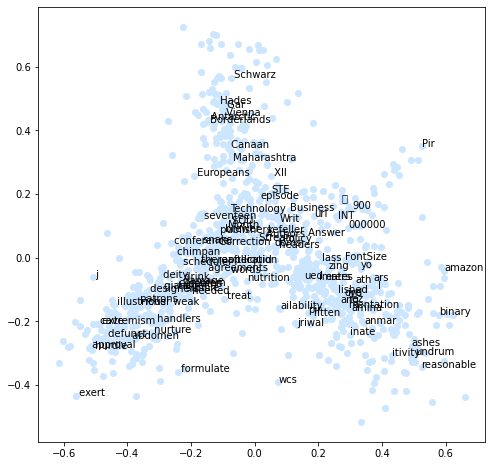

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

xy = PCA(2).fit_transform(dictionary)
plt.rcParams['figure.figsize'] = [8, 8]
plt.scatter(xy[:,0], xy[:,1], color=(0.8,0.9,1))
for i in range(0, n_components, 10):
    plt.text(xy[i,0], xy[i,1], component_labels[i], parse_math=False)